In [1]:
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import functools, inspect, sys
import seaborn as sns

In [2]:
tfd = tfp.distributions
distribution_class = tfp.distributions.Distribution
distributions = [name for name, obj in inspect.getmembers(tfd)
                 if inspect.isclass(obj) and issubclass(obj, distribution_class)]
print(distributions)

2023-09-07 17:34:52.402412: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 17:34:52.605257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 17:34:52.606179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 17:34:53.839752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


['AutoCompositeTensorDistribution', 'Autoregressive', 'BatchBroadcast', 'BatchConcat', 'BatchReshape', 'Bates', 'Bernoulli', 'Beta', 'BetaBinomial', 'BetaQuotient', 'Binomial', 'Blockwise', 'Categorical', 'Cauchy', 'Chi', 'Chi2', 'CholeskyLKJ', 'ContinuousBernoulli', 'DeterminantalPointProcess', 'Deterministic', 'Dirichlet', 'DirichletMultinomial', 'Distribution', 'DoublesidedMaxwell', 'Empirical', 'ExpGamma', 'ExpInverseGamma', 'ExpRelaxedOneHotCategorical', 'Exponential', 'ExponentiallyModifiedGaussian', 'FiniteDiscrete', 'Gamma', 'GammaGamma', 'GaussianProcess', 'GaussianProcessRegressionModel', 'GeneralizedExtremeValue', 'GeneralizedNormal', 'GeneralizedPareto', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'HalfStudentT', 'HiddenMarkovModel', 'Horseshoe', 'Independent', 'Inflated', 'InverseGamma', 'InverseGaussian', 'JohnsonSU', 'JointDistribution', 'JointDistributionCoroutine', 'JointDistributionCoroutineAutoBatched', 'JointDistributionNamed', 'JointDistributionNamedAutoBatc

In [3]:
normal = tfd.Normal(loc=0., scale=1.)

2023-09-07 17:34:55.387927: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
def plot_normal(N):
    samples = normal.sample(N)
    sns.displot(samples, kde=True)
    plt.title(f"Normal Distribution with zero mean, and 1 std. dev {N} samples")
    plt.show()

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


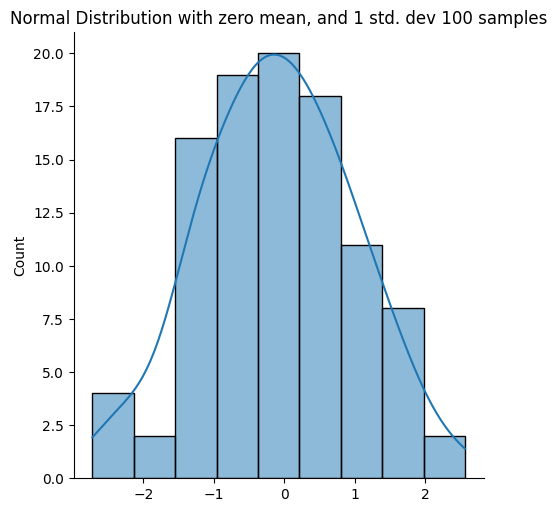

In [5]:
plot_normal(100)

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


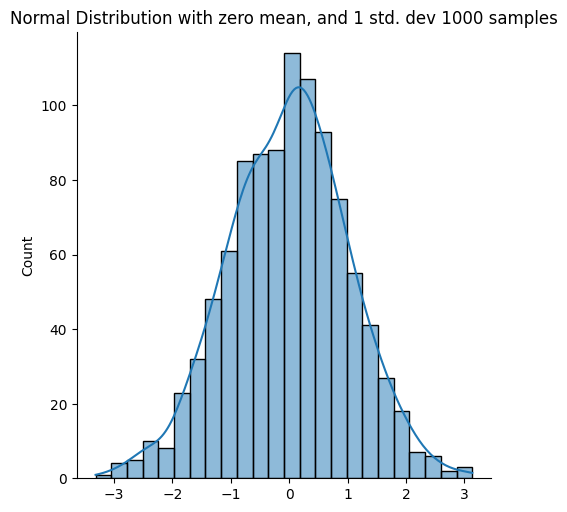

In [6]:
plot_normal(1000)

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


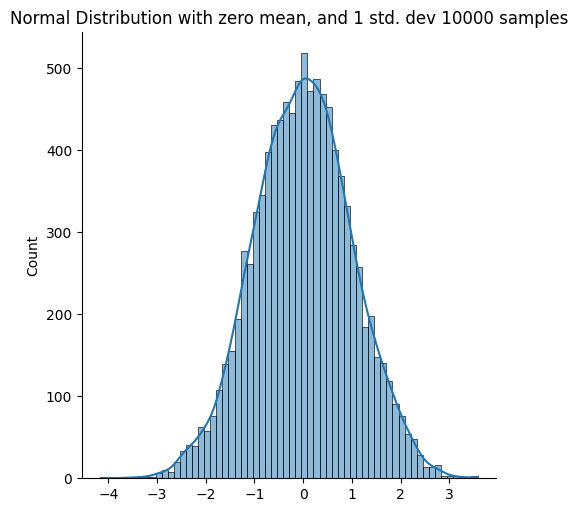

In [7]:
plot_normal(10000)

# TensorFlow Probability distributions

In [8]:
normal = tfd.Normal(loc=0., scale=1.)
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


In [9]:
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0788324>

In [10]:
normal.prob(0.1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.39695257>

In [11]:
normal_2 = tfd.Normal(loc=[0., 0.], scale=[1., 3.])
print(normal_2)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


In [12]:
normal_2.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.44353703, 1.3738427 ], dtype=float32)>

In [13]:
normal_2.prob(0.9)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.26608527, 0.12712924], dtype=float32)>

In [14]:
# create multivariate dependent 2D normal distribution
normal_3 = tfd.MultivariateNormalDiag(loc=[[1.0, 0.3]])
print(normal_3)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[1], event_shape=[2], dtype=float32)


In [15]:
normal_3.sample()

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.64618623, -0.06728521]], dtype=float32)>

In [16]:
normal_3.prob(0.9)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13227436], dtype=float32)>

## Coin Flip Example

### Scenario 1
A fair coin with a 0.5 probability of heads and 0.5 probability of tails.

In [17]:
import tensorflow as tf

(array([1011.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         989.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

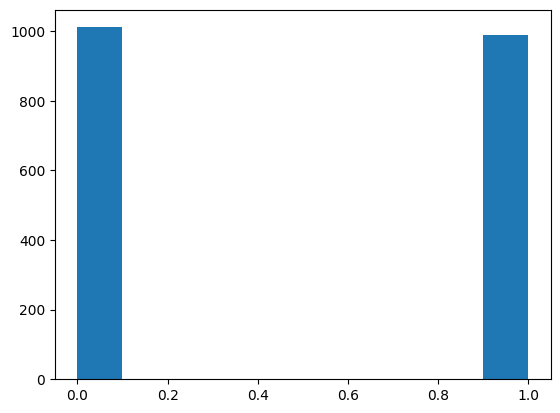

In [18]:
coin_flip = tfd.Bernoulli(probs=0.5, dtype=tf.int32)
coin_flip_data = coin_flip.sample(2000)
plt.hist(coin_flip_data)

In [19]:
coin_flip.prob(0) ## Probability of tail

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

### Scenario 2
A biased coin with a 0.8 probability of heads and 0.2 probability of tails.

(array([ 410.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1590.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

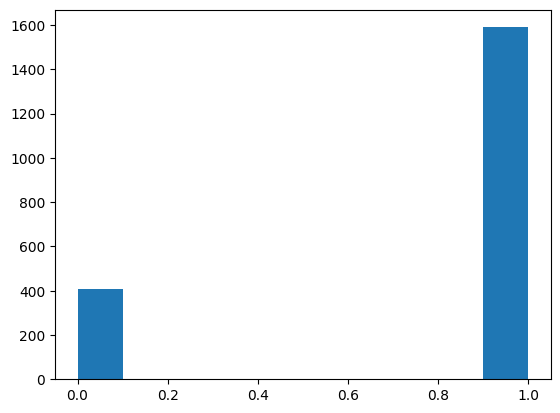

In [20]:
bias_coin_flip = tfd.Bernoulli(probs=0.8, dtype=tf.int32)
bias_coin_flip_data = bias_coin_flip.sample(2000)
plt.hist(bias_coin_flip_data)

In [21]:
bias_coin_flip.prob(0) ## Probability of tail

<tf.Tensor: shape=(), dtype=float32, numpy=0.19999999>

### Scenario 3
Two coins with one biased toward heads with a 0.8 probability, and the other biased toward heads
with a 0.6 probability.

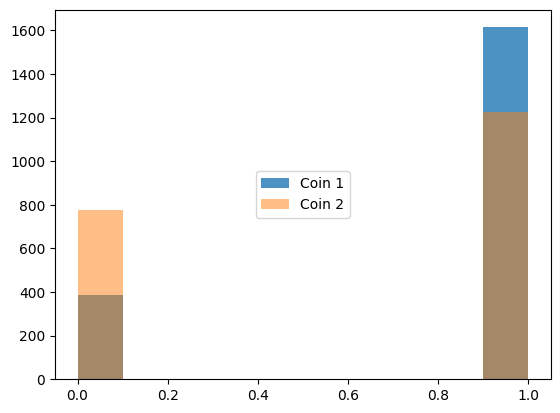

In [22]:
two_bias_coins_flip = tfd.Bernoulli(probs=[0.8, 0.6], dtype=tf.int32)
two_bias_coins_flip_data = two_bias_coins_flip.sample(2000)
plt.hist(two_bias_coins_flip_data[:,0], alpha=0.8, label='Coin 1')
plt.hist(two_bias_coins_flip_data[:,1], alpha=0.5, label='Coin 2')
plt.legend(loc='center')

# Normal distribution

## Univariate normal

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


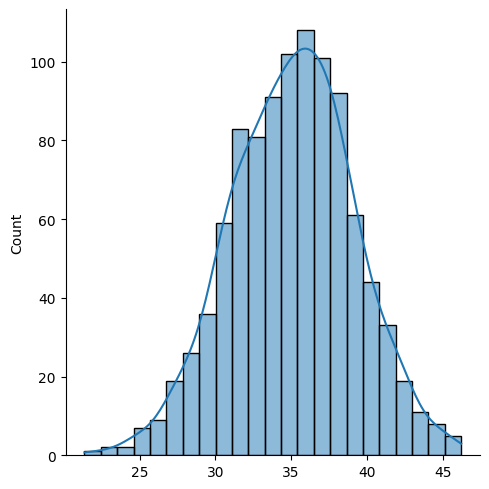

In [23]:
temperature = tfd.Normal(loc=35, scale=4)
temperature_data = temperature.sample(1000)
sns.displot(temperature_data, kde=True)

In [24]:
temperature.mean()

<tf.Tensor: shape=(), dtype=float32, numpy=35.0>

In [25]:
temperature.stddev()

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [26]:
tf.math.reduce_mean(temperature_data)

<tf.Tensor: shape=(), dtype=float32, numpy=35.08804>

In [27]:
tf.math.reduce_std(temperature_data)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0250287>

## Multivariate distribution

Text(0, 0.5, 'Humidity %')

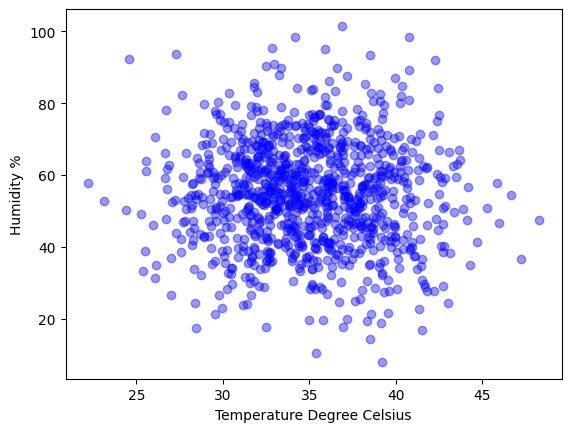

In [28]:
weather = tfd.MultivariateNormalDiag(loc = [35, 56], scale_diag=[4, 15])
weather_data = weather.sample(1000)
plt.scatter(weather_data[:, 0], weather_data[:, 1], color='blue', alpha=0.4)
plt.xlabel("Temperature Degree Celsius")
plt.ylabel("Humidity %")

# Bayesian networks

In [29]:
Root = tfd.JointDistributionCoroutine.Root

def model():
    # generate the distribution for cloudy weather
    cloudy = yield Root(tfd.Bernoulli(probs=0.2, dtype=tf.int32))
    
    # define sprinkle probability table
    sprinkler_prob = [0.5, 0.1]
    sprinkler_prob = tf.gather(sprinkler_prob, cloudy)
    sprinkler = yield tfd.Bernoulli(probs=sprinkler_prob, dtype=tf.int32)
    
    # define rain probability table
    raining_prob = [0.1, 0.8]
    raining_prob = tf.gather(raining_prob, cloudy)
    raining = yield tfd.Bernoulli(probs=raining_prob, dtype=tf.int32)
    
    #Conditional Probability table for wet grass
    grass_wet_prob = [[0.0, 0.8], 
                      [0.9, 0.99]]
    grass_wet_prob = tf.gather_nd(grass_wet_prob, _stack(sprinkler, raining))
    grass_wet = yield tfd.Bernoulli(probs=grass_wet_prob, dtype=tf.int32)

The above model will function like a data generator. The `Root` function is used to tell the node in the
graph without any parent. We define a few utility functions, `broadcast` and `stack`:

In [30]:
def _conform(ts):
    """Broadcast all arguments to a common shape."""
    shape = functools.reduce(tf.broadcast_static_shape, [a.shape for a in ts])
    return [tf.broadcast_to(a, shape) for a in ts]

def _stack(*ts):
    return tf.stack(_conform(ts), axis=-1)

To do inferences, we make use of the `MarginalizableJointDistributionCoroutine` class, as this
allows us to compute marginalized probabilities:

In [31]:
import tensorflow_probability.python.experimental.marginalize as marginalize

d = marginalize.MarginalizableJointDistributionCoroutine(model)

In [32]:
# We want to know the probability that it was raining
# and we want to marginalize over the state of the sprinkler.
observations = ['marginalize',  # We don't know the cloudy state
                'tabulate', # We want to know the probability it rained.
                'marginalize',  # We don't know the sprinkler state.
                1]              # We observed a wet lawn.
p = tf.exp(d.marginalized_log_prob(observations))
p = p / tf.reduce_sum(p)

In [33]:
p.numpy()

array([0.27761015, 0.72238994], dtype=float32)

In [34]:
observations = ['marginalize',  
                'marginalize', 
                'tabulate',  
                1]              
p = tf.exp(d.marginalized_log_prob(observations))
p = p / tf.reduce_sum(p)

In [35]:
observations = ['marginalize',  
                0, 
                0 ,  
                'tabulate']              
p = tf.exp(d.marginalized_log_prob(observations))
p = p / tf.reduce_sum(p)

In [36]:
p

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>